In [1]:
import numpy as np
import random
import os.path
import pickle as pkl
import torch
from tqdm import tqdm_gui

In [2]:
n=10
m=10

x_max=np.pi
x_min=0.0
num_x=30 

y_max=np.pi*2
y_min=0.0
num_y=30

T_max=1000.0
beta=5000.0

IC=200
train_cnt=0.75

In [3]:
dx = (x_max - x_min)/num_x
dy = (y_max - y_min)/num_y

In [4]:
x = np.append([np.arange(x_min,x_max,dx)],[x_max])

x_range = x.shape[0]
x = np.expand_dims(x, axis=0)
x = np.repeat(x,IC,axis=0)
x = np.expand_dims(x,axis=2)
c = np.zeros((IC, n))

for seed in range(1,IC+1,1):
    np.random.seed(seed)
    c[seed-1] = np.random.normal(0.0,1.0,n)

In [5]:
x = np.append([np.arange(x_min,x_max,dx)],[x_max])
x_range = x.shape[0]

y = np.append([np.arange(y_min,y_max,dy)],[y_max])
y_range = y.shape[0]

data = np.array([(i,j) for i in x for j in y]).reshape(31,31,2)

data = np.expand_dims(data, axis=0)
data = np.repeat(data,IC,axis=0)
data = np.expand_dims(data,axis=4)
        
c = np.zeros((IC, n, m,2))

In [6]:
for seed in range(1,IC+1,1):
    np.random.seed(seed)
    c[seed-1] = np.random.normal(0.0,1.0,(n,m,2))

In [7]:
#Plain Data Gen
dt=1.0

In [8]:
c.shape

(200, 10, 10, 2)

In [9]:
t = np.arange(0.0,T_max+dt,dt)
t_range = t.shape[0]
t = np.expand_dims(t, axis=(0,1,2,3))
t = np.repeat(t,IC,axis=0)

U = np.zeros((IC,x_range,y_range, 2, t_range))
# # U = np.zeros((IC,x_range, t_range))

t = np.repeat(t,x_range,axis=1)
t = np.repeat(t,y_range,axis=2)
t = np.repeat(t,2,axis=3)

data = np.repeat(data,t_range,axis=4)
# data = np.repeat(x,t_range,axis=2)

In [10]:
U.shape

(200, 31, 31, 2, 1001)

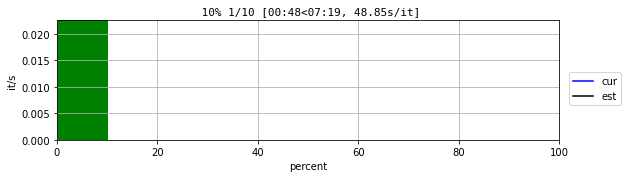

KeyboardInterrupt: 

In [14]:
for i in range(n):
    for j in tqdm_gui(range(m)):
        temp_c = np.expand_dims(c[:,i,j],axis=(1,2,4))
        temp_c = np.repeat(np.repeat(np.repeat(temp_c,x_range,axis=1),y_range,axis=2), t_range, axis=4)
#         temp_c = np.expand_dims(c[:,i],axis=(1,2))
#         temp_c = np.repeat(np.repeat(temp_c,x_range,axis=1), t_range, axis=2)
        temp_exp = np.exp(t*-beta*((np.pi*i/x_max)**2)*(np.pi*j/y_max)**2)
        temp_term = temp_c*np.sin((i*np.pi*data))
        temp = temp_term*temp_exp
        U += (1.0/n)*temp